# Thinh Nguyen
# Homework 4
# Dr Olenick
# Comp Phys

Number of data points =  1560
A = -3060.07 +/- 15.00, B =  1.54 +/- 0.01
chi-square = 740.14
chi-square/dof =   0.48
r =  0.99


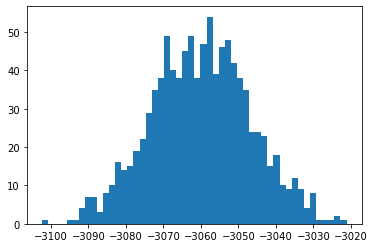

The best straight line fit is y = -3.06E+03 +/- 1.50e+01 + (1.54e+00 +/- 7.71E-03)x


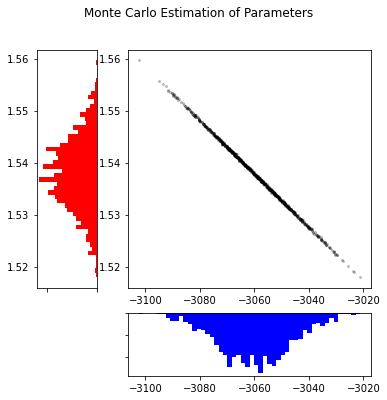

In [1]:
#1.
#construct a least squares fit and determine goodness of the fit
#plot the data and fitted curve
#Monte Carlo estimate on CSIRO

import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('CSIRO_Recons_gmsl_mo_2011.txt',float, skiprows=1)

x = np.array(data[:,0])  #independent variable
y = np.array(data[:,1])  #dependent variable
sig_y = np.array(data[:,2])
N = len(x)               #number of data points

#define least squares fit
def leastsqrs(x,y):
    #initialize our variables
    sum_x = 0
    sum_y = 0
    sum_xy = 0
    sum_xx = 0
    A = 0
    B = 0
   
    #perform sums
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xx = np.sum(x*x)
    sum_xy = np.inner(x,y)
   
    #determine the coefficients A and B
    Delta = N*sum_xx - sum_x*sum_x
    A = (sum_xx*sum_y - sum_x*sum_xy)/Delta
    B = (N*sum_xy - sum_x*sum_y)/Delta
    sig_A = np.mean(sig_y)*np.sqrt(np.sum(x*x)/Delta)
    sig_B = np.mean(sig_y)*np.sqrt(N/Delta)    
    return [A,B,sig_A,sig_B]

#calculate chi square
def chi_calc(x,y,sig_y,A,B):
    chi_square = 0
    chi_square = np.sum((y - (A + B*x))**2/(2*sig_y**2))
    # for i in range(0,len(sig_y)):
    #     chi_square = chi_square + (y[i] - (A + B*x[i]))**2/(2*sig_y[i]**2)
    return chi_square

def r(x,y):
    r = 0
    sum_diff_xy = 0
    sum_xdiff_sqr = 0
    sum_ydiff_sqr = 0
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    sum_xdiff_sqr = np.sum((x-x_bar)**2)
    sum_ydiff_sqr = np.sum((y-y_bar)**2)
    sum_diff_xy = np.sum((x-x_bar)*(y-y_bar))
    r = sum_diff_xy/np.sqrt(sum_xdiff_sqr*sum_ydiff_sqr)
    return r
coeffs = []
coeffs = leastsqrs(x,y)
A = coeffs[0]
B = coeffs[1]
sig_A = coeffs[2]
sig_B = coeffs[3]
chi_square = chi_calc(x, y, sig_y, A, B)

print('Number of data points = ', N)
print('A = {0:5.2f} +/- {2:5.2f}, B = {1:5.2f} +/-{3:5.2f}'.format(A,B,sig_A,sig_B))
print('chi-square = {0:5.2f}'.format(chi_square))
print('chi-square/dof = {0:6.2f}'.format(chi_square/(N-2)))
print("r = {0:5.2f}".format(r(x,y)))  


######################## Monte Carlo follows
N_trial = 1000 #number of trials
FitParms = np.array([])
A_values = np.zeros(N_trial)
B_values = np.zeros(N_trial)
unc_A_values = np.zeros(N_trial)
unc_B_values = np.zeros(N_trial)

y_err = np.sqrt(sum((y - (A+B*x))**2)/(N-2))
xmin = x[0]
xmax = x[-1]

#create rando data
for j in range(N_trial):
    xTrial = np.random.uniform(xmin, xmax, size=N)
    yTrial = A + B*xTrial + np.random.normal(loc=0, scale = y_err, size=N)
    A_values[j], B_values[j], unc_A_values[j], unc_B_values[j] = leastsqrs(xTrial, yTrial)
   
plt.hist(A_values, bins = 50)    
plt.show()
A = np.mean(A_values)
B = np.mean(B_values)
unc_A = np.mean(unc_A_values)
unc_B = np.mean(unc_B_values)
print('The best straight line fit is y = {0:4.2E} +/- {1:4.2e} + ({2:4.2e} +/- {3:4.2E})x'.format(A,unc_A,B,unc_B))
#multiaxes histogram
fig = plt.figure(figsize = (6,6))
fig.suptitle('Monte Carlo Estimation of Parameters')
grid = plt.GridSpec(4,4,hspace = 0.4,wspace = 0.5)
main_ax = fig.add_subplot(grid[:-1,1:])
y_hist = fig.add_subplot(grid[:-1,0], xticklabels = [], sharey = main_ax)
x_hist = fig.add_subplot(grid[-1,1:], yticklabels = [], sharex = main_ax)

#scatter points on the main axes
main_ax.plot(A_values, B_values, 'ok', markersize=2, alpha= 0.2)
#histogram on the attached axes
x_hist.hist(A_values,50, histtype='stepfilled', orientation='vertical', color ='blue')
x_hist.invert_yaxis()
y_hist.hist(B_values,50, histtype='stepfilled', orientation='horizontal', color ='red')
y_hist.invert_xaxis()
plt.show()

fitted voltage function coefficients: 
[5.0386261  0.01232256]
covarience of coefficients: 
[[1.28581636e-03 2.98470039e-06]
 [2.98470039e-06 2.24716009e-08]]
chi-square =  0.03


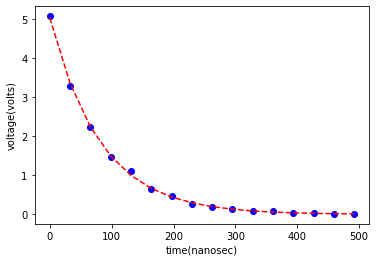

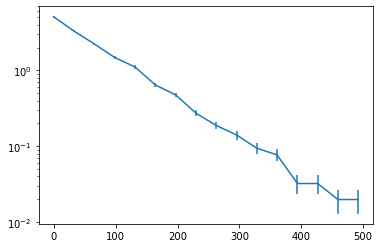

In [3]:
#2.
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

data = np.loadtxt("v_acc_indc_in_RL_circ.txt", skiprows=1)
x = np.array(data[:,0])
y = np.array(data[:,1])
sig_y = np.array(data[:,2])


def func(t, V_0, G):
    return V_0*np.exp(-G*t)


#init fit for
p0=[5.0,1/70.0]
#curve_fit() take the test function and x, y data as arguments
#fit the curve to data
param, param_cov = curve_fit(func, x, y,p0)
print('fitted voltage function coefficients: ')
print(param)
print('covarience of coefficients: ')
print(param_cov)
#plot the data and fitted curve
fitted = param[0]*np.exp(-param[1] * x)

#calculate chi square
chi_square = np.sum((y - param[0]*np.exp(-param[1]*x))**2/(param[0]*np.exp(-param[1]*x)))
print('chi-square = {0:5.2f}'.format(chi_square))


#plot the data and fitted curve
fitted = param[0]*np.exp(-param[1] * x)
plt.xlabel('time(nanosec)')
plt.ylabel('voltage(volts)')
plt.plot(x, y, 'o', color='b')
plt.plot(x, fitted, '--', color='r', label='optimised fit')
plt.show()

plt.errorbar(x,y,yerr=sig_y)
plt.yscale('log')
plt.show()

A = 14.779957 +/- 0.541217, B = 0.597148 +/- 0.037347, C = 18.121599 +/- 0.492955
omega = 0.780112 +/- 0.003518, tau = 11.441282 +/- 0.449619


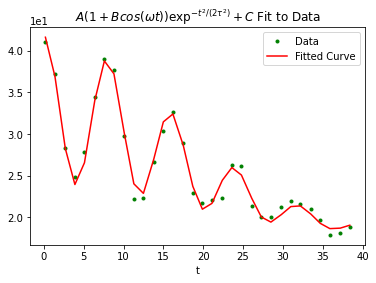

Mean A =  14.828, Std A =  0.633
Mean B =   0.598, Std B =  0.045
Mean C =  18.074, Std B =  0.594
Mean omega =   0.780, Std B =  0.004
Mean tau =  11.475, Std B =  0.550


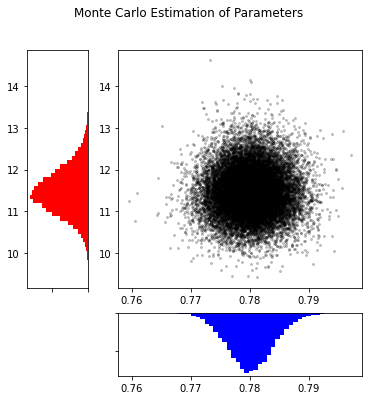

In [5]:
#3 & 5.
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

N = 50
#We create data as follows:
data = np.loadtxt('spec.txt', float)
t = np.array(data[:,0])
y = np.array(data[:,1])
yerr = np.array(data[:,2])

#initial guesses for parameters
A0,B0,C0,omega0,tau0 = 8,8,20,0.75,20

#function to fit to data
def func(t, A, B, C, omega, tau):
    return A*(1 + B*np.cos(omega*t))*np.exp(-t**2/(2*tau)**2) + C

popt,pcov=curve_fit(func,t,y,p0=[A0,B0,C0,omega0,tau0],sigma=None)
perr = np.sqrt(np.diag(pcov))   #computes one standard deviation errors on the parameters

print("A = {0:8.6f} +/- {1:8.6f}, B = {2:8.6f} +/- {3:8.6f}, C = {4:8.6f} +/- {5:8.6f}".format(popt[0],perr[0], popt[1],perr[1],popt[2],perr[2]))
print("omega = {0:8.6f} +/- {1:8.6f}, tau = {2:8.6f} +/- {3:8.6f}".format(popt[3],perr[3], popt[4],perr[4]))


plt.plot(t,y,"g.", label = 'Data')
plt.plot(t, func(t,*popt),'r-', label='Fitted Curve')
plt.title(r'$A(1+Bcos(\omega t))\exp^{-t^2/(2\tau^2)} + C$ Fit to Data')
plt.ticklabel_format(axis = 'y', style='sci', scilimits = (-4,-3))
plt.xlabel('t')
plt.legend()
plt.show()
A = popt[0]
B = popt[1]
C = popt[2]
omega = popt[3]
tau = popt[4]


N_trial = 20000  #number of trials
#create arrays for values of A, B, and their uncertainties
A_values = np.zeros(N_trial)
B_values = np.zeros(N_trial)
C_values = np.zeros(N_trial)
omega_values = np.zeros(N_trial)
tau_values = np.zeros(N_trial)
unc_A_values = np.zeros(N_trial)
unc_B_values = np.zeros(N_trial)
unc_C_values = np.zeros(N_trial)
unc_omega_values = np.zeros(N_trial)
unc_tau_values = np.zeros(N_trial)
Nt = len(t)
y_err = yerr
tmin = min(t)
tmax = max(t)

#create random data
for j in range(N_trial):
    tTrial = np.random.uniform(tmin,tmax, size=Nt)  #create as many x values as original range
    yTrial = func(tTrial,A,B,C,omega,tau) + np.random.normal(loc=0, scale = y_err, size = Nt)#func(xTrial,A,B,C) + np.random.normal(loc=0, scale = y_err, size = N)
    popt,pcov=curve_fit(func,tTrial,yTrial,p0=[A,B,C,omega,tau],sigma=None)
    perr = np.sqrt(np.diag(pcov))
    A_values[j] = popt[0]
    unc_A_values[j] = perr[0]
    B_values[j] = popt[1]
    unc_B_values[j] = perr[1]
    C_values[j] = popt[2]
    unc_C_values[j] = perr[2]
    omega_values[j] = popt[3]
    unc_omega_values[j] = perr[3]
    tau_values[j] = popt[4]
    unc_tau_values[j] = perr[4]

A = np.mean(A_values)
B = np.mean(B_values)
C = np.mean(C_values)
omega = np.mean(omega_values)
tau = np.mean(tau_values)
unc_A = np.mean(unc_A_values)
unc_B = np.mean(unc_B_values)
unc_C = np.mean(unc_C_values)
unc_omega = np.mean(unc_omega_values)
unc_tau = np.mean(unc_tau_values)

#print('The best fit is y = {0:4.3E} +/- {1:4.3E} + ({2:4.3E} +/- {3:4.3E})x + ({4:4.3E} +/- {5:4.3E})x^2'.format(A,unc_A,B,unc_B,C,unc_C))

print("Mean A =  {0:6.3f}, Std A = {1:6.3f}".format(np.mean(A_values),
np.std(A_values)))
print("Mean B =  {0:6.3f}, Std B = {1:6.3f}".format(np.mean(B_values),
np.std(B_values)))
print("Mean C =  {0:6.3f}, Std B = {1:6.3f}".format(np.mean(C_values),
np.std(C_values)))
print("Mean omega =  {0:6.3f}, Std B = {1:6.3f}".format(np.mean(omega_values),
np.std(omega_values)))
print("Mean tau =  {0:6.3f}, Std B = {1:6.3f}".format(np.mean(tau_values),
np.std(tau_values)))

fig = plt.figure(figsize=(6, 6))
fig.suptitle('Monte Carlo Estimation of Parameters')
grid = plt.GridSpec(4, 4, hspace=0.4, wspace=0.5)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(omega_values, tau_values , 'ok', markersize=2, alpha=0.2)

# histogram on the attached axes
x_hist.hist(omega_values, 50, histtype='stepfilled',
             orientation='vertical', color='blue')
x_hist.invert_yaxis()
y_hist.hist(tau_values, 50, histtype='stepfilled',
             orientation='horizontal', color='red')
y_hist.invert_xaxis()

plt.show()

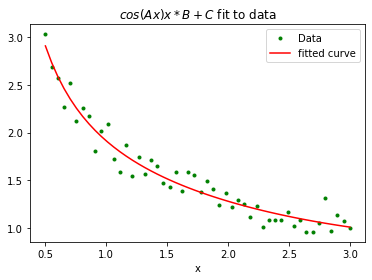

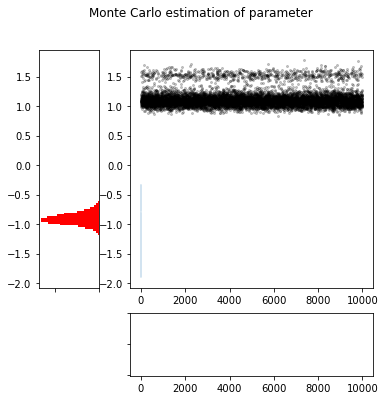

In [16]:
#4
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
N = 50
#We create data as follows:
x = np.linspace(0.5,3,50)
y = np.cos(0.4*x)**2/x**1 + 1.0
ysigma = np.std(y)/4

y = y +  np.random.normal(loc=0, scale=ysigma, size=N)

#init guesses for parameters
A0, B0, C0 = 1.4, -1.5, 0.1

def func(x, A, B, C):
    return np.cos(A*x)*x**B + C

popt, pcov = curve_fit(func, x ,y, p0=[A0, B0, C0], sigma=None)
perr = np.sqrt(np.diag(pcov))

plt.plot(x,y,"g.", label = 'Data')
plt.plot(x, func(x, *popt), 'r-', label='fitted curve')
plt.title(r'$cos(Ax)x*B + C$ fit to data')
plt.ticklabel_format(axis='y', style = 'sci', scilimits =(-4,-3))
plt.xlabel('x')
plt.legend()
plt.show()
A = popt[0]
B = popt[1]
C = popt[2]

N_trial = 10000 #num of trials
#arrays for val A, B, C and their uncertainties
A_values = np.zeros(N_trial)
B_values = np.zeros(N_trial)
C_values = np.zeros(N_trial)
unc_A_values = np.zeros(N_trial)
unc_B_values = np.zeros(N_trial)
unc_C_values = np.zeros(N_trial)
Nx = len(x)
y_err = np.std(y)/4
xmin = min(x)
xmax = max(x)

#create rando data
for j in range(N_trial):
    xTrial = np.random.uniform(xmin, xmax, size=Nx)
    yTrial = func(xTrial,A,B,C) + np.random.normal(loc=0,scale =y_err,size = Nx)
    popt,pcov = curve_fit(func, xTrial, yTrial, p0=[A0, B0, C0], sigma=None)
    perr= np.sqrt(np.diag(pcov))
    A_values[j] = popt[0]
    unc_A_values[j]= perr[0]
    B_values[j] = popt[1]
    unc_B_values[j]= perr[1]
    C_values[j] = popt[2]
    unc_C_values[j]= perr[2]
    
A = np.mean(A_values)
B = np.mean(B_values)
C = np.mean(C_values)
unc_A = np.mean(unc_A_values)
unc_B = np.mean(unc_B_values)
unc_C = np.mean(unc_C_values)

fig = plt.figure(figsize=(6,6))
fig.suptitle("Monte Carlo estimation of parameter")
grid = plt.GridSpec(4, 4, hspace=0.4, wspace=0.5)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)
# scatter points on the main axes
main_ax.plot(A_values, B_values, C_values, 'ok', markersize=2, alpha=0.2)
# histogram on the attached axes
x_hist.hist(A_values, 50, histtype='stepfilled', orientation='vertical', color='blue')
x_hist.invert_yaxis()
y_hist.hist(B_values, 50, histtype='stepfilled', orientation='horizontal', color='red')
y_hist.invert_xaxis()
plt.show()

In [1]:
#find the angle to shoot 
from math import *
from scipy.optimize import fsolve, bisect, newton
tolerance = 0.01
xnew = 1.5 #init guess

def f(x):
    return 60 + 200*sin(x)*((0-1952)/(200*cos(x)+0.514))-(9.8/2)*((0-1952)/(200*cos(x)+0.514))

def f_prime(x):
    return (195200000*(2450*sin(x) - 257*cos(x) -100000))/((100000*cos(x) + 257)**2)

for i in range(100):
    x = xnew
    xnew = x - f(x)/f_prime(x)
    if abs(x-xnew) < tolerance:
        print('theta is ',xnew *100)
        break


theta is  5.5297945479816955
